**Data Pre-Processing**

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as nm
import matplotlib.pyplot as mtp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [91]:
df= pd.read_csv('Iris.csv')

In [92]:
df.Species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('0', '1', '2'), inplace=True)

In [93]:
df.shape

(150, 6)

In [94]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [95]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [96]:
df.groupby('Species').size()

Species
0    50
1    50
2    50
dtype: int64

**Dividing data into features and labels**

In [97]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

**Spliting dataset into training set and test set**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Data Visualization** (Parallel Coordinates)

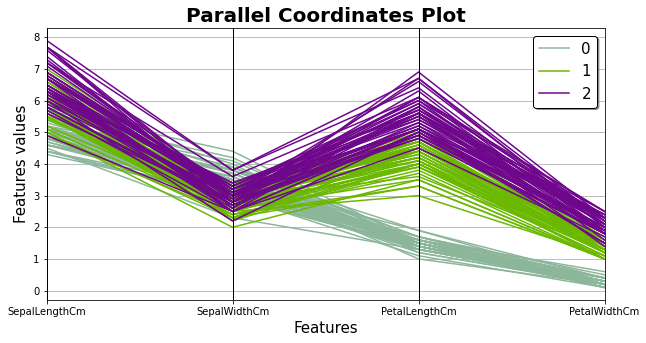

In [99]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,5))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

**Andrews Curves**

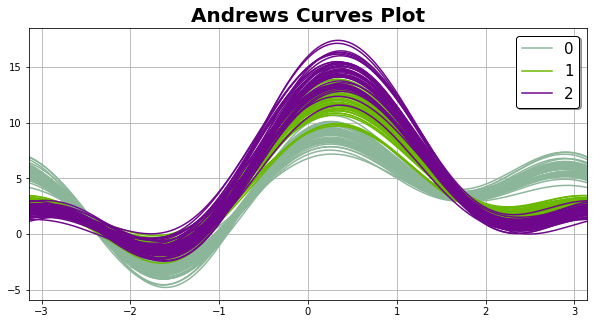

In [100]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(10,5))
andrews_curves(df.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

**Pairplot**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

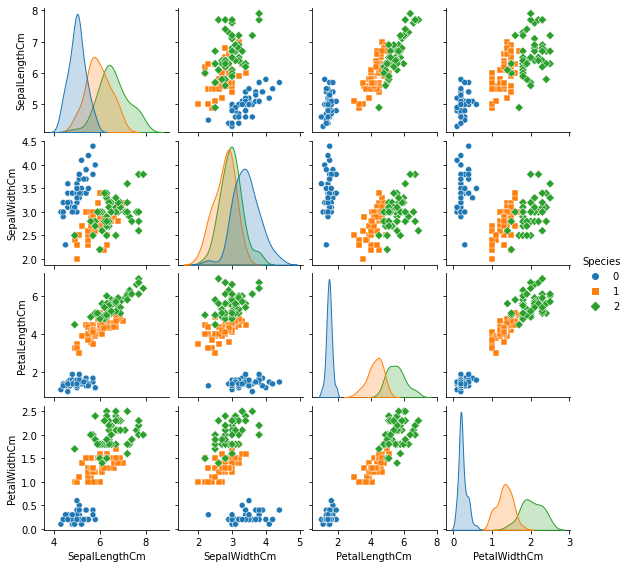

In [101]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=2, markers=["o", "s", "D"])
plt.show()

**Boxplots**

<Figure size 432x288 with 0 Axes>

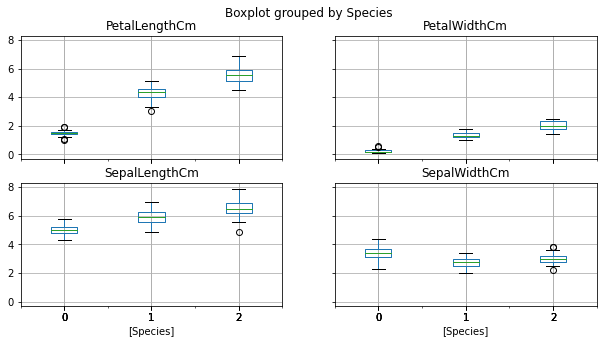

In [102]:
plt.figure()
df.drop("Id", axis=1).boxplot(by="Species", figsize=(10, 5))
plt.show()

**Find Accuracy**

In [104]:
k_range =range(1,18)
scores={}
scores_list=[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  Y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,Y_pred)
  scores_list.append( metrics.accuracy_score(y_test,Y_pred))
scores

{1: 1.0,
 2: 0.9666666666666667,
 3: 0.9666666666666667,
 4: 1.0,
 5: 0.9666666666666667,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0}